<a href="https://colab.research.google.com/github/MohammadPashaee/AI-Super-Course/blob/main/Assignments/S1/S1A7/S1A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/garments_worker_productivity.csv")

In [ ]:
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df_nans_filled = df.fillna(df.mean())

<ipython-input-16-a44ca989ad30>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nans_filled = df.fillna(df.mean())


In [ ]:
df_x = df_nans_filled.drop(labels=["date", "quarter", "department", "day"], axis=1)
df_y = df_nans_filled[["actual_productivity"]]

print(df_x.shape, df_y.shape)

(1197, 11) (1197, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_nrm = scaler.fit_transform(df_x)

In [ ]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

In [ ]:
from keras.callbacks import EarlyStopping

callBack  = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=x_train.shape[1:]))

model.add(Dense(256, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

results = model.fit(x_train, y_train, epochs=32, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/32
30/30 [==============================] - 2s 15ms/step - loss: 0.0940 - val_loss: 0.0157
Epoch 2/32
30/30 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 3/32
30/30 [==============================] - 0s 13ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 4/32
30/30 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 5/32
30/30 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 6/32
30/30 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0039
Epoch 7/32
30/30 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 8/32
30/30 [==============================] - 0s 14ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 9/32
30/30 [==============================] - 0s 13ms/step - loss: 7.8282e-04 - val_loss: 0.0014
Epoch 10/32
30/30 [==============================] - 0s 11ms/step - loss: 9.4445e-04 - val_loss: 0.0020
Ep

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               6144      
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 156,033
Trainable params: 156,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
yhat_test = model.predict(x_test)

8/8 [==============================] - 0s 9ms/step


In [ ]:
import matplotlib.pyplot as plt

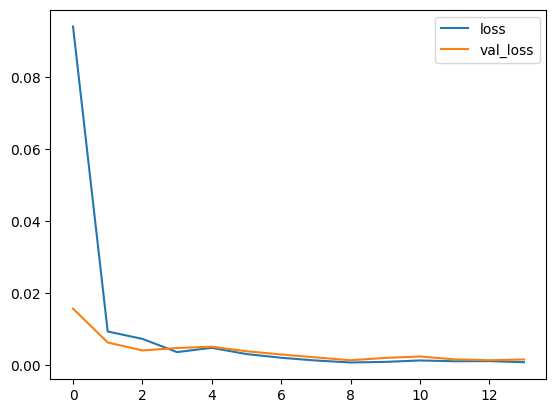

In [ ]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.legend()

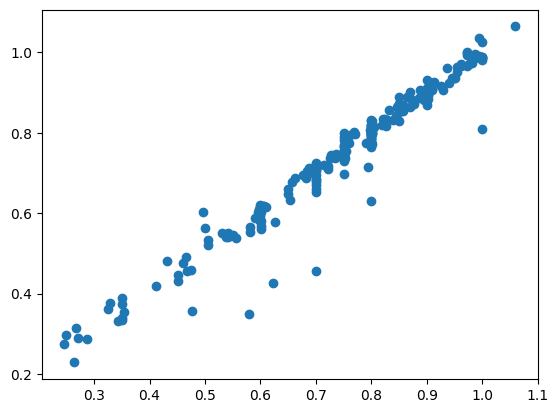

In [ ]:
plt.scatter(y_test, yhat_test)

In [ ]:
model1 = Sequential()

model1.add(Dense(512, activation='tanh', input_shape=x_train.shape[1:]))

model1.add(Dense(256, activation='relu'))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(32, activation='relu'))

model1.add(Dense(1, 'linear'))

model1.compile(optimizer='adam', loss='mse')

results1 = model1.fit(x_train, y_train, epochs=32, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/32
30/30 [==============================] - 3s 29ms/step - loss: 0.0603 - val_loss: 0.0126
Epoch 2/32
30/30 [==============================] - 0s 9ms/step - loss: 0.0132 - val_loss: 0.0082
Epoch 3/32
30/30 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 4/32
30/30 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 5/32
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0076
Epoch 6/32
30/30 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 7/32
30/30 [==============================] - 0s 9ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/32
30/30 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/32
30/30 [==============================] - 0s 7ms/step - loss: 8.5830e-04 - val_loss: 0.0020
Epoch 10/32
30/30 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 11/32
30

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               6144      
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 156,033
Trainable params: 156,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
yhat_test1 = model1.predict(x_test)

8/8 [==============================] - 0s 6ms/step


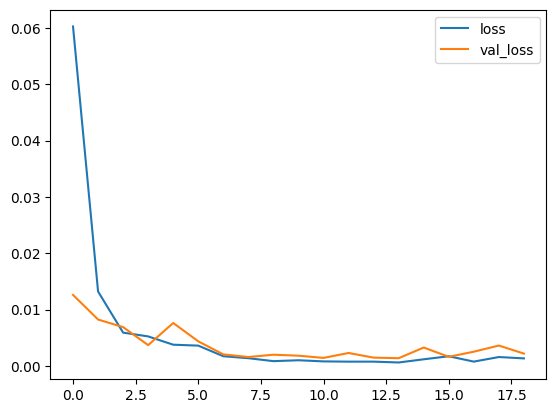

In [ ]:
plt.plot(results1.history["loss"], label="loss")
plt.plot(results1.history["val_loss"], label="val_loss")

plt.legend()

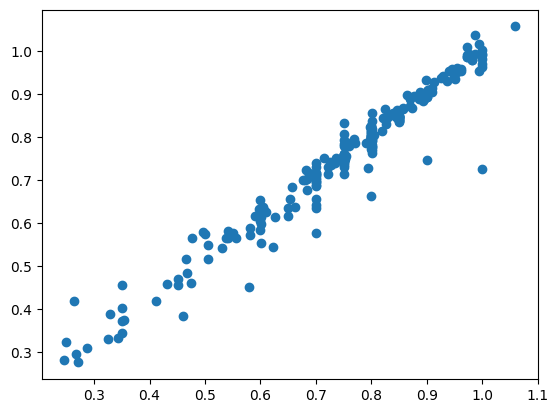

In [ ]:
plt.scatter(y_test, yhat_test1)

In [ ]:
model2 = Sequential()

model2.add(Dense(512, activation='relu', input_shape=x_train.shape[1:]))

model2.add(Dense(256, activation='relu'))

model2.add(Dense(64, activation='relu'))

model2.add(Dense(32, activation='relu'))

model2.add(Dense(16, activation='relu'))

model2.add(Dense(1, 'linear'))

model2.compile(optimizer='adam', loss='mse')

results2 = model2.fit(x_train, y_train, epochs=32, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/32
30/30 [==============================] - 2s 24ms/step - loss: 0.1799 - val_loss: 0.0169
Epoch 2/32
30/30 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0076
Epoch 3/32
30/30 [==============================] - 0s 14ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 4/32
30/30 [==============================] - 0s 14ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 5/32
30/30 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 6/32
30/30 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 7/32
30/30 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 8/32
30/30 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 9/32
30/30 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/32
30/30 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 11/32
30

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               6144      
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 156,545
Trainable params: 156,545
Non-tr

In [ ]:
yhat_test2 = model2.predict(x_test)

8/8 [==============================] - 1s 13ms/step


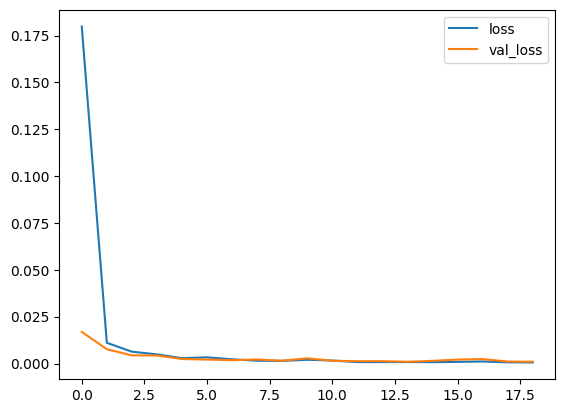

In [ ]:
plt.plot(results2.history["loss"], label="loss")
plt.plot(results2.history["val_loss"], label="val_loss")

plt.legend()

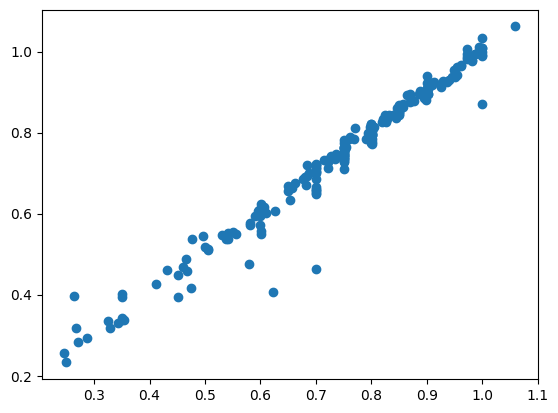

In [ ]:
plt.scatter(y_test, yhat_test2)